
--- Part B: Multi-class Classification (Iris Dataset) ---

### Performance Summary of SVM Models (Iris) ###
             Model  Kernel          Parameters  Accuracy  F1-Score (Macro)
0  SVM_Linear_Iris  linear  C=1.0, gamma=scale  0.911111          0.910714
1    SVM_Poly_Iris    poly  C=1.0, gamma=scale  0.866667          0.861111
2     SVM_RBF_Iris     rbf   C=1.0, gamma=auto  0.933333          0.933259


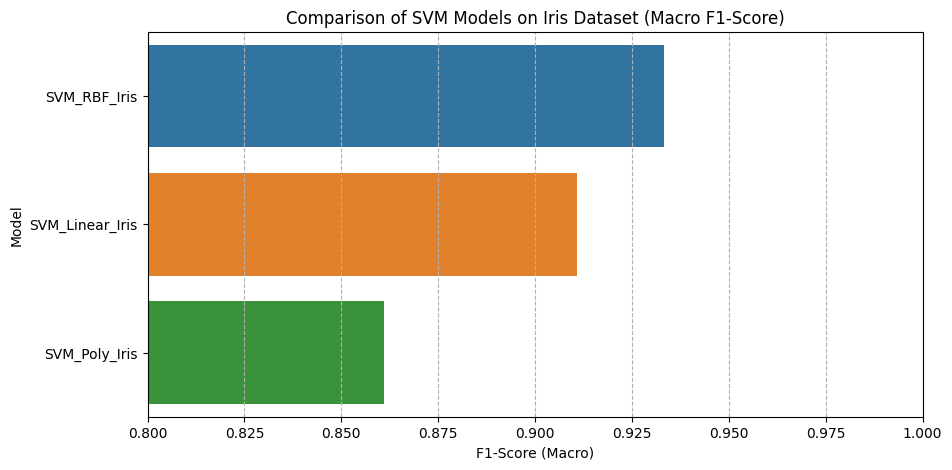


--- Detailed Analysis of the Best Model: SVM_RBF_Iris ---



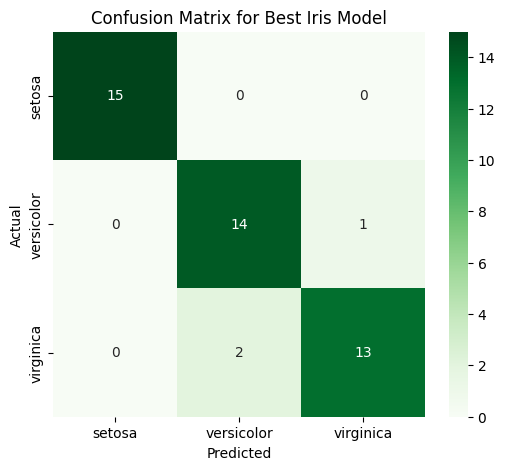

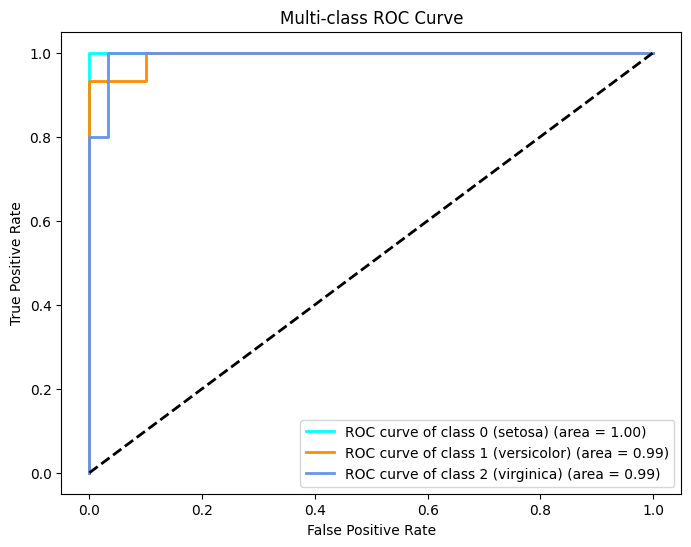

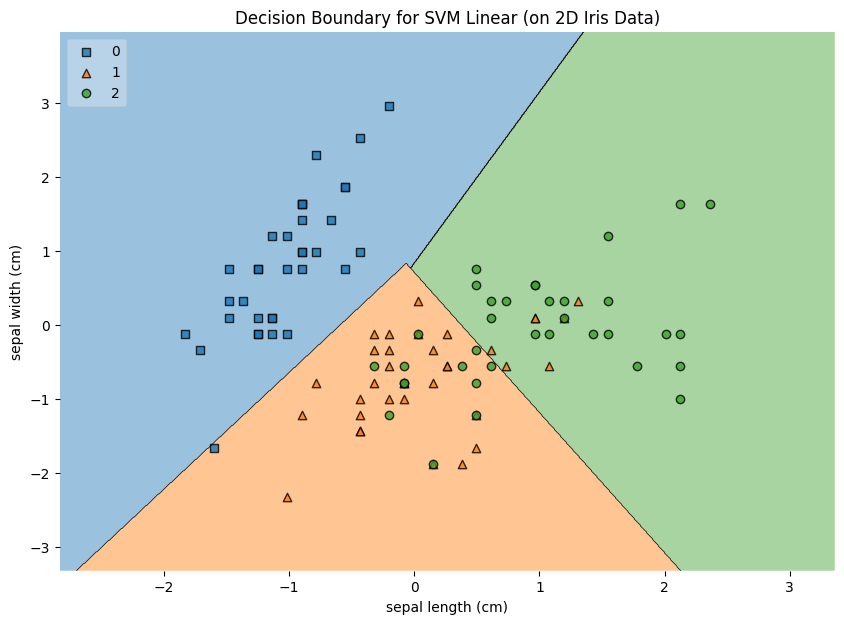

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve, auc
from mlxtend.plotting import plot_decision_regions

print("\n--- Part B: Multi-class Classification (Iris Dataset) ---\n")
iris = load_iris()
X_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
y_iris = pd.Series(iris.target)
X_iris_2d = X_iris.iloc[:, :2]

X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.3, random_state=42, stratify=y_iris)

scaler_iris = StandardScaler()
X_train_iris_scaled = scaler_iris.fit_transform(X_train_iris)
X_test_iris_scaled = scaler_iris.transform(X_test_iris)

models_iris = {
    "SVM_Linear_Iris": SVC(kernel='linear', C=1.0, probability=True, random_state=42),
    "SVM_Poly_Iris": SVC(kernel='poly', degree=3, C=1.0, probability=True, random_state=42),
    "SVM_RBF_Iris": SVC(kernel='rbf', C=1.0, gamma='auto', probability=True, random_state=42)
}

results_iris = []

for name, model in models_iris.items():
    model.fit(X_train_iris_scaled, y_train_iris)
    y_pred_iris = model.predict(X_test_iris_scaled)
    params = model.get_params()
    results_iris.append({
        "Model": name,
        "Kernel": params['kernel'],
        "Parameters": f"C={params['C']}, gamma={params.get('gamma', 'N/A')}",
        "Accuracy": accuracy_score(y_test_iris, y_pred_iris),
        "F1-Score (Macro)": f1_score(y_test_iris, y_pred_iris, average='macro')
    })

results_iris_df = pd.DataFrame(results_iris)
print("### Performance Summary of SVM Models (Iris) ###")
print(results_iris_df.to_string())

plt.figure(figsize=(10, 5))
sns.barplot(x='F1-Score (Macro)', y='Model', data=results_iris_df.sort_values('F1-Score (Macro)', ascending=False))
plt.title('Comparison of SVM Models on Iris Dataset (Macro F1-Score)')
plt.xlabel('F1-Score (Macro)')
plt.ylabel('Model')
plt.xlim(0.8, 1.0)
plt.grid(axis='x', linestyle='--')
plt.show()

best_model_name_iris = results_iris_df.loc[results_iris_df['F1-Score (Macro)'].idxmax()]['Model']
best_model_iris = models_iris[best_model_name_iris]
print(f"\n--- Detailed Analysis of the Best Model: {best_model_name_iris} ---\n")

y_pred_best_iris = best_model_iris.predict(X_test_iris_scaled)
cm_iris = confusion_matrix(y_test_iris, y_pred_best_iris)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_iris, annot=True, fmt='d', cmap='Greens', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix for Best Iris Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

y_test_bin = label_binarize(y_test_iris, classes=[0, 1, 2])
y_prob_best_iris = best_model_iris.predict_proba(X_test_iris_scaled)
n_classes = y_test_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob_best_iris[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} ({iris.target_names[i]}) (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('Multi-class ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

X_train_2d, _, y_train_2d, _ = train_test_split(X_iris_2d, y_iris, test_size=0.3, random_state=42, stratify=y_iris)
scaler_2d = StandardScaler()
X_train_2d_scaled = scaler_2d.fit_transform(X_train_2d)
model_2d_iris = SVC(kernel='linear', C=1.0, random_state=42)
model_2d_iris.fit(X_train_2d_scaled, y_train_2d)

plt.figure(figsize=(10, 7))
plot_decision_regions(X_train_2d_scaled, y_train_2d.to_numpy(), clf=model_2d_iris, legend=2)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title(f'Decision Boundary for SVM Linear (on 2D Iris Data)')
plt.show()